# Chronic Kidney Disease

The dataset is taken from kaggle and can be found [here](https://www.kaggle.com/datasets/mansoordaku/ckdisease).

The dataset contains the following features (ID is dropped at the first instance):
1. age: Age (yrs)
2. bp: Blood Pressure (mm/Hg)
3. sg: Specific Gravity
4. al: Albumin
5. su: Sugar
6. rbc: Red Blood Cells
7. pc: Pus Cells
8. pcc: Pus Cell Clumps
9. ba: Bacteria
10. bgr: Blood Glucose Random (mg/dL)
11. bu: Blood Urea (mg/dL)
12. sc: Serum Creatinine (mg/dL)
13. sod: Sodium (mEq/L)
14. pot: Potassium (mEq/L)
15. hemo: Hemoglobin (g)
16. pcv: Packed Cell Volume
17. wbc: White Blood Cells count (cells/cmm)
18. rc: Red Blood Cells count (millions/cmm)
19. htn: Hypertension
20. dm: Diabetes Mellitus
21. cad: Coronary Artery Disease
22. appet: Appetite
23. pe: Pedal Edema
24. ane: Anemia
24. classification: Patient has Chronic Kidney Disease or Not.

This dataset has been collected over a two-month period in India.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Chronic Kidney Disease/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Drop the id column:

In [3]:
data.drop('id', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

The abbreviated column names are hard to grasp - rename them to their actual names:

In [4]:
column_names = ['Age','Blood Pressure','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random','Blood Urea',
               'Serum Creatinine','Sodium','Potassium','Hemoglobin','Packed Cell Volume',
               'White Blood Cells','Red Blood Cells Count','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns = column_names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cells                335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

Describe the numerical data:

In [5]:
data.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Data Preprocessing

Correlation between the numerical attributes:

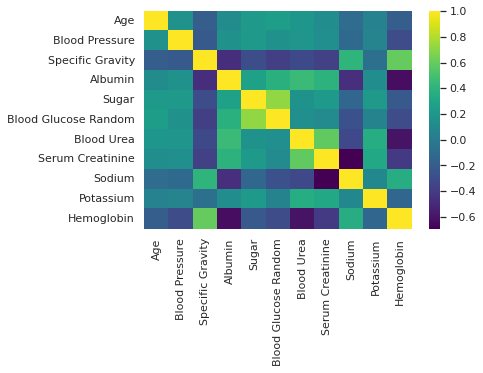

In [6]:
sns.heatmap(data.corr(), cmap = 'viridis')

There is only one visible correlation - Blood Glucose Random and Sugar, which is in part self-explanatory. There is another correlation worth noting: Specific Gravity and Hemoglobin.

There are missing values in the dataset. We check for missing values:

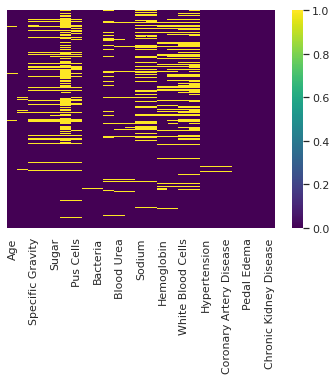

In [7]:
sns.heatmap(data.isnull(), cmap = 'viridis', yticklabels=False)

It seems  that except for the Target column, Chronic Kidney Disease and Pedal Edema, thre are missing values in all other columns. The missing values seem manageable and thus, we do not need to drop any columns or rows. It must be noted that smaller number of missing values cannot be seen on the heatmap. Thus, we can check numerically:

In [8]:
data.isnull().sum()

Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cells                   65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          70
White Blood Cells          105
Red Blood Cells Count      130
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Chronic Kidney Disease       0
dtype: int64

Pedal Edema has 1 missing value after all, which we did not catch from the heatmap. 

Let us find the missing values:

In [9]:
for column in data.columns:
  print('Unique values of "{}" are: \n'.format(column), data[column].unique())

Unique values of "Age" are: 
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Unique values of "Blood Pressure" are: 
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Unique values of "Specific Gravity" are: 
 [1.02  1.01  1.005 1.015   nan 1.025]
Unique values of "Albumin" are: 
 [ 1.  4.  2.  3.  0. nan  5.]
Unique values of "Sugar" are: 
 [ 0.  3.  4.  1. nan  2.  5.]
Unique values of "Red Blood Cells" are: 
 [nan 'normal' 'abnormal']
Unique values of "Pus Cells" are: 
 ['normal' 'abnormal' nan]
Unique values of "Pus Cell Clumps" are: 
 ['notpresent' 'present' nan]
Unique values of "Bacteria" are: 
 ['notpresent' 'present' nan]
Unique values of "Blood Glucose Random" are: 
 [121.  nan 423. 117. 106.  74. 100. 410

We now replace the erorrs within individual columns:

In [10]:
data['Packed Cell Volume'] = data['Packed Cell Volume'].replace('\t?', np.nan)
data['Packed Cell Volume'] = data['Packed Cell Volume'].replace('\t43', '43')
data['White Blood Cells'] = data['White Blood Cells'].replace('\t6200', '6200')
data['White Blood Cells'] = data['White Blood Cells'].replace('\t8400', '8400')
data['White Blood Cells'] = data['White Blood Cells'].replace('\t?', np.nan)
data['Red Blood Cells Count'] = data['Red Blood Cells Count'].replace('\t?', np.nan)
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].replace({'\tno': 'no', '\tyes':  'yes', ' yes':'yes'})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].replace({'\tno': 'no', 'yes': 'yes'})
data['Chronic Kidney Disease'] = data['Chronic Kidney Disease'].replace({'ckd\t': 'ckd'})

Check:

In [11]:
cols = ['Packed Cell Volume', 'White Blood Cells', 'Red Blood Cells Count', 'Diabetes Mellitus', 
        'Coronary Artery Disease', 'Chronic Kidney Disease']
for column in data.columns:
  if column in cols:
    print('Unique values of "{}" are: \n'.format(column), data[column].unique())

Unique values of "Packed Cell Volume" are: 
 ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
Unique values of "White Blood Cells" are: 
 ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
Unique values of "Red 

We use Simple Imputer to Impute the missing values:

In [12]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Imputer.fit(data)
data_imputed = Imputer.transform(data)
Imputed_data = pd.DataFrame(data_imputed, columns = data.columns)
Imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      400 non-null    object
 1   Blood Pressure           400 non-null    object
 2   Specific Gravity         400 non-null    object
 3   Albumin                  400 non-null    object
 4   Sugar                    400 non-null    object
 5   Red Blood Cells          400 non-null    object
 6   Pus Cells                400 non-null    object
 7   Pus Cell Clumps          400 non-null    object
 8   Bacteria                 400 non-null    object
 9   Blood Glucose Random     400 non-null    object
 10  Blood Urea               400 non-null    object
 11  Serum Creatinine         400 non-null    object
 12  Sodium                   400 non-null    object
 13  Potassium                400 non-null    object
 14  Hemoglobin               400 non-null    o

In [13]:
for x in data.select_dtypes(exclude='object').columns:
  Imputed_data[x] = Imputed_data[x].astype(float)
Imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    object 
 6   Pus Cells                400 non-null    object 
 7   Pus Cell Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

In [14]:
for x in Imputed_data.select_dtypes(exclude='float64').columns:
  print('Unique values for categorical variable "{}":\n'.format(x), Imputed_data[x].unique())

Unique values for categorical variable "Red Blood Cells":
 ['normal' 'abnormal']
Unique values for categorical variable "Pus Cells":
 ['normal' 'abnormal']
Unique values for categorical variable "Pus Cell Clumps":
 ['notpresent' 'present']
Unique values for categorical variable "Bacteria":
 ['notpresent' 'present']
Unique values for categorical variable "Packed Cell Volume":
 ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
Unique values for categorical variable "White Blood Cells":
 ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '680

We can actually convert the numerical variables to float too; they are just of string type:

In [15]:
Imputed_data['Packed Cell Volume'] = Imputed_data['Packed Cell Volume'].apply(lambda x: float(x))
Imputed_data['White Blood Cells'] = Imputed_data['White Blood Cells'].astype(float)
Imputed_data['Red Blood Cells Count'] = Imputed_data['Red Blood Cells Count'].astype(float)

In [16]:
Imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    object 
 6   Pus Cells                400 non-null    object 
 7   Pus Cell Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

We choose not to encode the target class:

In [17]:
target = Imputed_data['Chronic Kidney Disease']
Imputed_data.drop('Chronic Kidney Disease', axis = 1, inplace = True)

Since the categorical variables are categorical ordinal in nature, we can use Label Encoding:

## Categorical Variable - Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for x in Imputed_data.select_dtypes(exclude = "float64").columns:
  encoder.fit(Imputed_data[x])
  Imputed_data[x] = encoder.transform(Imputed_data[x])

Imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    int64  
 6   Pus Cells                400 non-null    int64  
 7   Pus Cell Clumps          400 non-null    int64  
 8   Bacteria                 400 non-null    int64  
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

## Data Analysis

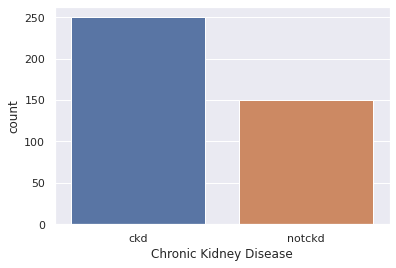

In [19]:
sns.countplot(x = target)

There is an imbalance in the target class.

<Figure size 504x504 with 0 Axes>

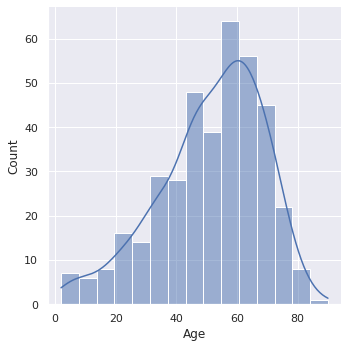

<Figure size 504x504 with 0 Axes>

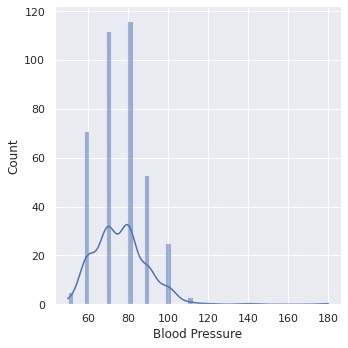

<Figure size 504x504 with 0 Axes>

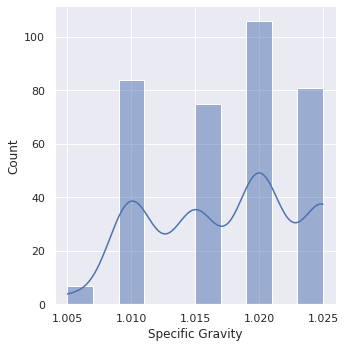

<Figure size 504x504 with 0 Axes>

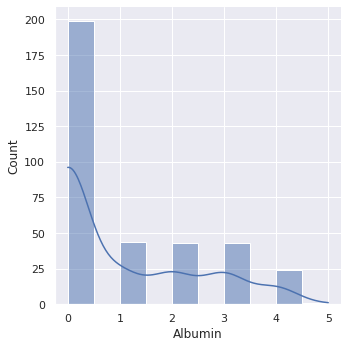

<Figure size 504x504 with 0 Axes>

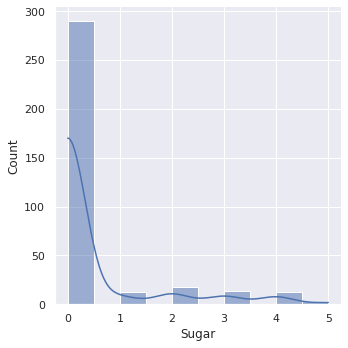

<Figure size 504x504 with 0 Axes>

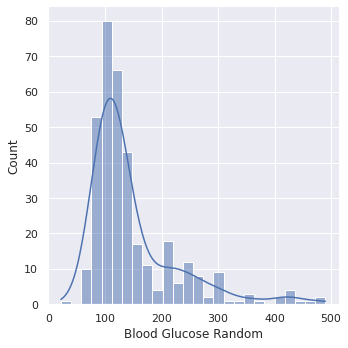

<Figure size 504x504 with 0 Axes>

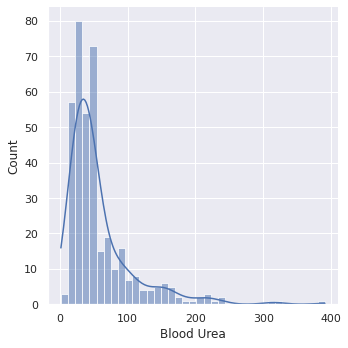

<Figure size 504x504 with 0 Axes>

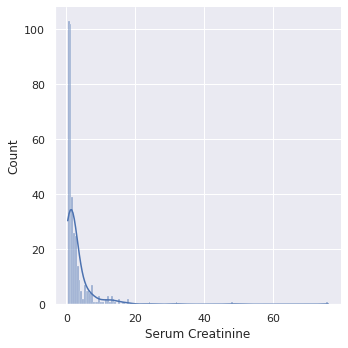

<Figure size 504x504 with 0 Axes>

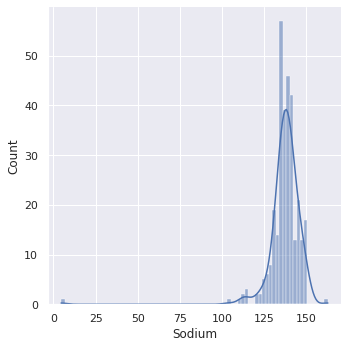

<Figure size 504x504 with 0 Axes>

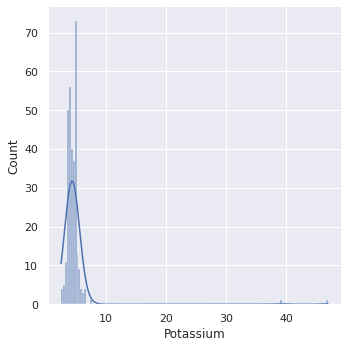

<Figure size 504x504 with 0 Axes>

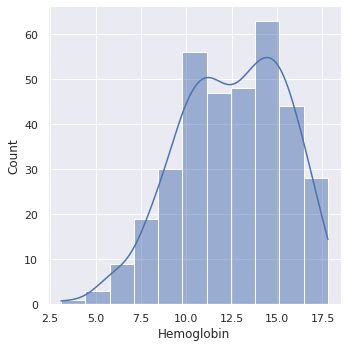

In [20]:
for x in data.select_dtypes(exclude = 'object').columns:
  plt.figure(figsize = (7,7))
  sns.displot(data[x], kde = True)
  plt.show()

Few Notes:
- The age distribution is right-skewed. This is justifiable since Chronic Kidney Disease patients tend to belong to the older age group than in the late 20's or even 30's. 
- If we assume that the BP values are Diastolic, the we can infer that majority of the patients have normal Blood Pressure.
- Sugar and Albumin seems to be encoded to reflect some category, thus we cannot infer from it any significant detail.
- Over 250 patients have Specific Gravity in the nromal ranges.
- From the curve of Blood Glucose Random, we can infer that significant number of patients are either in their pre-diabetic stage or already has Diabetes Mellitus, since it is a numerical measure of the categorical variable Diabetes Mellitus.
- Significant number of patients have abnormally high levels of Blood Urea, which indicates that their kidney is not functioning well.
- A quick glace at the Creatinine levels indicates that their levels may be abnormally high (see plot below). This factor also indicates a dysfunction in the kidneys.
- It appears that most people have normal levels of sodium, which may also be the reason why they also don't have BP, as seen above. We can also see that the potassium levels of most patients fall within the normal range.
- It also seems that Hemoglobin levels for most patients fall within the normally permitted range. 

(0.0, 5.0)

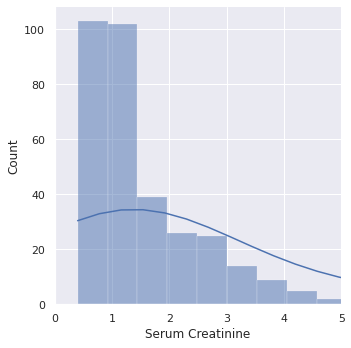

In [21]:
sns.displot(data['Serum Creatinine'], kde = True)
plt.xlim([0, 5])

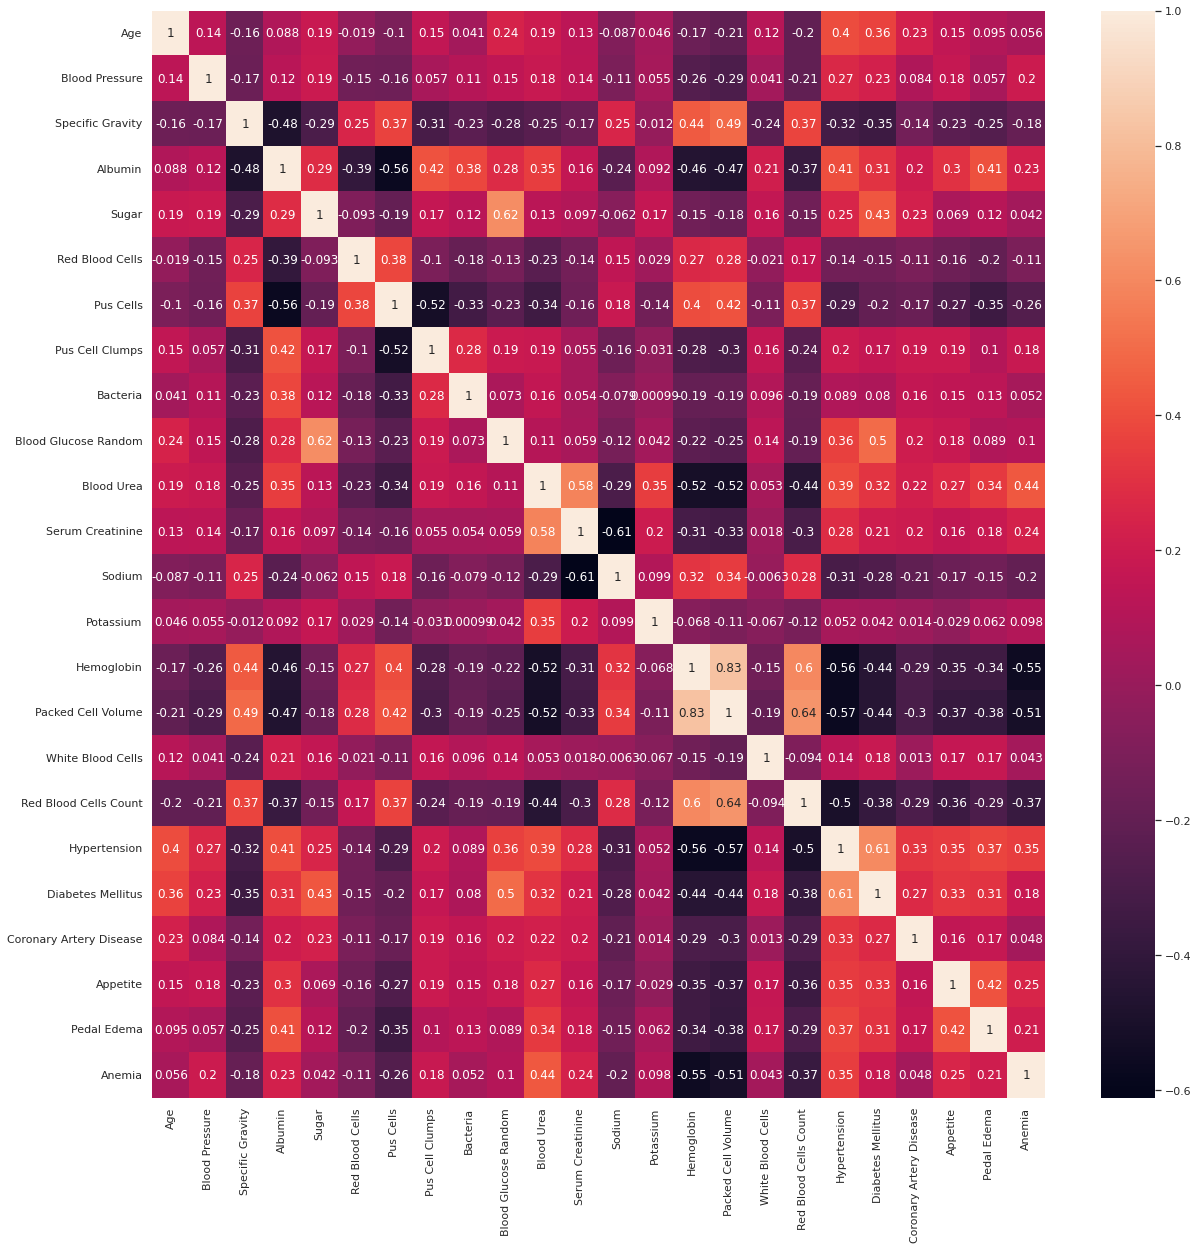

In [22]:
plt.figure(figsize = (20, 20))
sns.heatmap(Imputed_data.corr(), annot = True)

We cannot find any correlation of significance except between Packed Cell Volume and Hemoglobin.

Let us check the dataset to ensure we have a clean dataset:

In [23]:
Imputed_data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cells,Red Blood Cells Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


Save the preprocessed dataset:

In [24]:
Imputed_data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Chronic Kidney Disease/Chronic Kidney Disease Preprocessed.csv')